## **TER**

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from IPython.display import display, HTML

# chemin en modifer
chemin = "/Users/thomassinapi/Desktop/M1 Data Science/TER/dataprojectstage_masterUPS.xlsx"

df = pd.read_excel(chemin)

---
## ***Visualisation des données***
---

In [412]:
df.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1


In [413]:
df.columns

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y, target variable)'],
      dtype='object')

In [414]:
df.describe()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,3720.500000,9.329839,45.169086,12935.380780,11460.958065,0.089651,56.217608,0.105132,0.022043,0.534677,0.384812,0.200000
std,2147.887334,9.978688,14.796470,6204.246855,6018.551851,0.285700,19.383323,0.061108,0.146833,0.498830,0.486584,0.400027
min,1.000000,0.000000,18.000000,546.000000,546.000000,0.000000,6.000000,0.005128,0.000000,0.000000,0.000000,0.000000
25%,1860.750000,2.000000,33.000000,8149.250000,6845.750000,0.000000,48.000000,0.069020,0.000000,0.000000,0.000000,0.000000
50%,3720.500000,5.000000,46.000000,11950.000000,10382.500000,0.000000,60.000000,0.094662,0.000000,1.000000,0.000000,0.000000
75%,5580.250000,15.000000,55.000000,16500.000000,15000.000000,0.000000,72.000000,0.130379,0.000000,1.000000,1.000000,0.000000
max,7440.000000,58.000000,89.000000,47051.000000,30000.000000,1.000000,96.000000,2.630000,1.000000,1.000000,1.000000,1.000000


In [415]:
df.dtypes


ID                                int64
Job tenure                        int64
Age                               int64
Car price                         int64
Funding amount                    int64
Down payment                      int64
Loan duration                     int64
Monthly payment                 float64
Credit event                      int64
Married                           int64
Homeowner                         int64
Default (y, target variable)      int64
dtype: object

In [416]:
print(f"Nb missing values: {df.isnull().sum().sum()}")

Nb missing values: 0


In [417]:
from collections import Counter
counter = Counter(df["Default (y, target variable)"])
counter
# 1 n'a pas remboursé et 0 a remboursé


Counter({0: 5952, 1: 1488})

In [418]:
# transforme les variables ages en catégories (18-23, 24-30, 31-40, 41-50, 51-60, 61-70, 71-90)
df['Age'] = pd.cut(df['Age'], bins=[0, 23, 30, 40, 50, 60, 70, 100], labels=['0-23', '24-30', '31-40', '41-50', '51-60', '61-70', '71-100'])
df['Age'].value_counts()

Age
51-60     1760
41-50     1711
31-40     1332
24-30      967
61-70      738
0-23       570
71-100     362
Name: count, dtype: int64

In [419]:
# transforme les variables job tenure en catégories (0-2, 3-5, 6-10, 11-20, 21-30, 31-40, 41-50, 51-80)
df['Job tenure'] = pd.cut(df['Job tenure'], bins=[0, 2, 5, 10, 20, 30, 40, 50, 80], labels=['0-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-80'])
df['Job tenure'].value_counts()

Job tenure
0-2      1499
11-20    1350
3-5      1313
6-10     1224
21-30     771
31-40     291
41-50      55
51-80       4
Name: count, dtype: int64

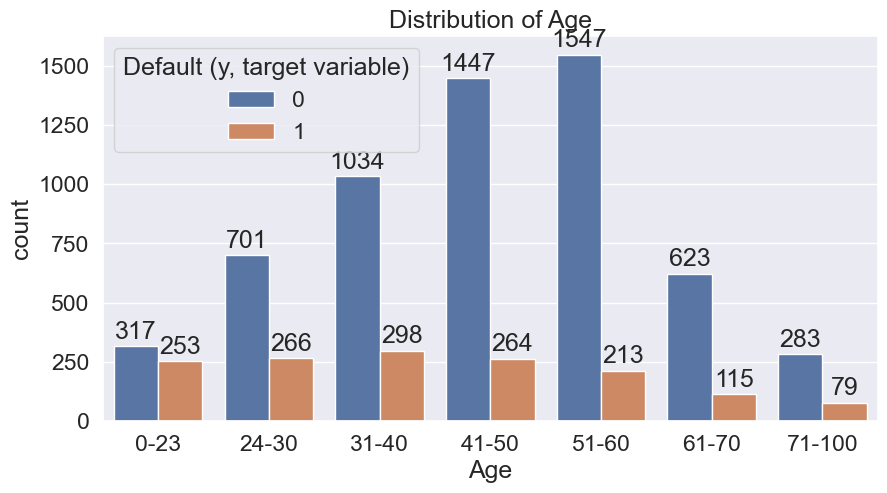

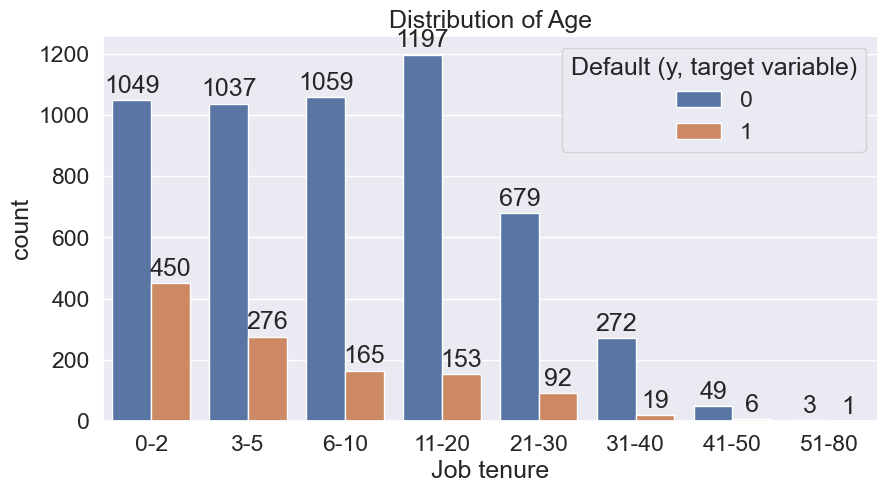

In [420]:
from matplotlib.pyplot import scatter


# distribution de la variable cible en fonction de l'age  
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Age', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()

# distribution de la variable cible en fonction de l'ancienneté
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Job tenure', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()



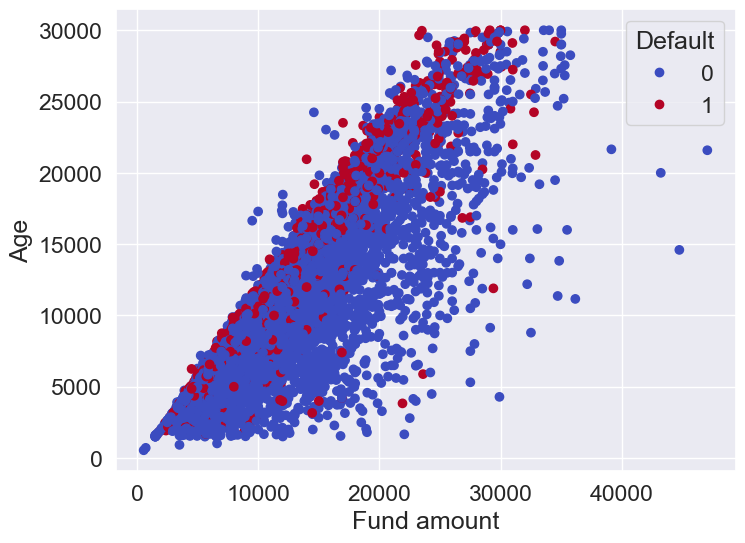

In [398]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Car price"], df["Funding amount"], c=df["Default (y, target variable)"], cmap='coolwarm')
plt.xlabel('Fund amount')
plt.ylabel('Age')
# legend for y_train
plt.legend(*scatter.legend_elements(), title="Default")
plt.show()

---
#### ***Standardisation des données numériques***
---

In [399]:
from sklearn.preprocessing import StandardScaler

# standard scaler pour numeric variables uniquement
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)




---
#### ***Encodage variables catégorielles***
---

In [400]:
# One hot encoding pour les variables catégorielles
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="error")
age_encod = encoder.fit_transform(df[["Age"]]).toarray()
df_age_encoded = pd.DataFrame(age_encod, columns=encoder.get_feature_names_out())

df1 = pd.concat([df_scaled, df_age_encoded], axis=1)

In [401]:
from sklearn.model_selection import train_test_split
X = df1.drop("Default (y, target variable)", axis=1)
X = X.drop("ID", axis=1) # colonne inutile
y = df1["Default (y, target variable)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=42)

print(f"TRAIN SIZE: {X_train.shape[0], y_train.shape[0]} -> {X_train.shape[0] / X.shape[0] * 100:.2f}%")
print(f"VAL   SIZE: {X_val.shape[0], y_val.shape[0]} -> {X_val.shape[0] / X.shape[0] * 100:.2f}%")
print(f"TEST  SIZE: {X_test.shape[0], y_test.shape[0]} -> {X_test.shape[0] / X.shape[0] * 100:.2f}%")

TRAIN SIZE: (5208, 5208) -> 70.00%
VAL   SIZE: (1488, 1488) -> 20.00%
TEST  SIZE: (744, 744) -> 10.00%


In [405]:
X

,Job tenure,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Age_0-23,Age_24-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-100
0,2.472451,-1.299259,-1.391451,-0.313814,-1.043111,-0.936722,-0.150133,0.932892,1.264386,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.433938,0.010416,0.255734,-0.313814,0.195150,-0.220371,-0.150133,-1.071936,-0.790898,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.468045,0.685805,0.453469,-0.313814,0.195150,-0.276527,-0.150133,-1.071936,-0.790898,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.668486,1.585733,2.011756,-0.313814,-0.423981,0.081045,-0.150133,0.932892,1.264386,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.834819,-0.843895,-0.487685,-0.313814,-0.423981,0.299032,-0.150133,0.932892,-0.790898,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,-0.834819,0.814758,1.084892,-0.313814,0.814280,0.341513,-0.150133,-1.071936,1.264386,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7436,-0.734599,1.622324,2.152995,-0.313814,0.814280,0.987971,-0.150133,0.932892,-0.790898,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7437,-0.834819,0.653567,1.133578,-0.313814,0.195150,-0.299328,-0.150133,-1.071936,-0.790898,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,-0.834819,0.089399,-0.836629,3.186601,-1.043111,-0.020348,-0.150133,-1.071936,-0.790898,0.0,1.0,0.0,0.0,0.0,0.0,0.0


---
## ***PCA***
---

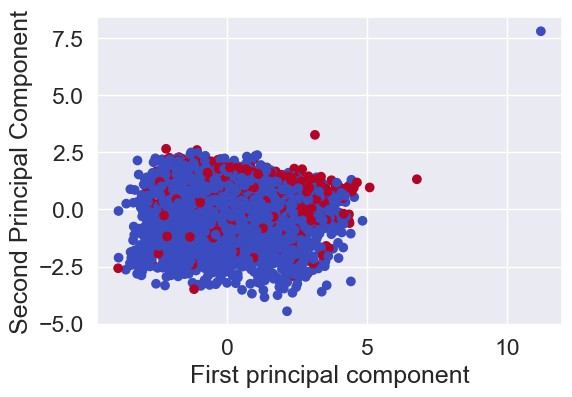

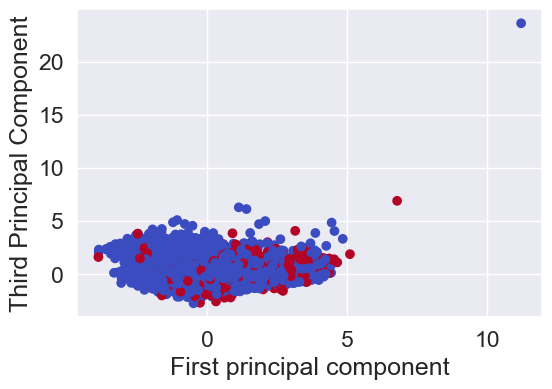

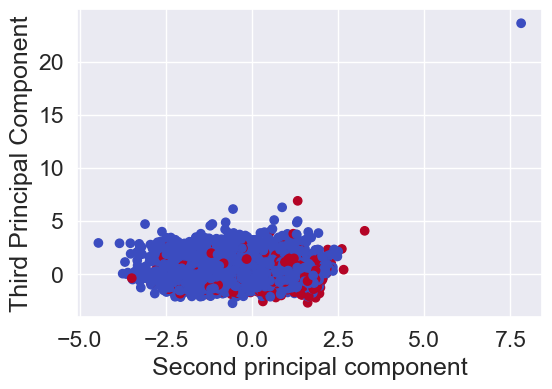

In [402]:
# pca 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')
plt.show()

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.show()



In [403]:
# slider dans tous les axes pour voir les composantes
from ipywidgets import interact, fixed
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_pca(i, j, k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, i-1], X_train_pca[:, j-1], X_train_pca[:, k-1], c=y_train, label="Default", cmap='coolwarm')
    ax.set_xlabel(f"PCA {i}")
    ax.set_ylabel(f"PCA {j}")
    ax.set_zlabel(f"PCA {k}")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Target")
    plt.title("PCA 3D Components Visualization")
    plt.show()

interact(plot_3d_pca, i=(1,3), j=(1, 3), k=(1, 3))


# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_train_pca[:, 2], X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label="Default", cmap='coolwarm')
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# cbar = plt.colorbar(scatter)
# cbar.set_label("Target")
# plt.title("PCA 3D Components Visualization")
# plt.show()

interactive(children=(IntSlider(value=2, description='i', max=3, min=1), IntSlider(value=2, description='j', m…

<function __main__.plot_3d_pca(i, j, k)>

---
## ***Modèles***
---

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# SVM
# dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "Dummy": DummyClassifier( strategy='most_frequent', random_state=42)
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# plot un tableau avec les scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare.T)



# confusion matrix
y_preds = models['XGBoost'].predict(X_test)
confusion_matrix(y_test, y_preds)
# plot confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("true label")
    plt.xlabel("predicted label")

plot_conf_mat(y_test, y_preds)

# # feature importance
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# clf.feature_importances_


# # plot feature importance
# feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(11).plot(kind='barh')
# plt.show()

# use balanced accuracy score since the classes are imbalanced

# balanced accuracy score
print("\n")
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_preds):.2f}%")


ValueError: Unknown label type: 'continuous'

In [ ]:
def evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"Balanced accuracy: <b>{balanced_score:7.2%}</b> <br/>"
    ))

def pca_evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    y_pred = clf.predict(X_test_pca)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"Balanced accuracy: <b>{balanced_score:7.2%}</b> <br/>"
    ))


---
## ***Grid Search***
---

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

#gird search cv
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [1, 5, 10],
    'learning_rate': [0.01,0.05, 0.1, 0.3]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}

---
## ***Tests différentes méthodes de preprocessing et modèles***
---

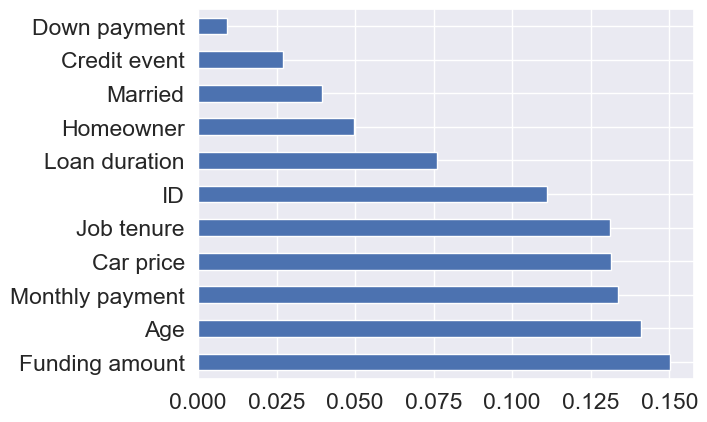

In [ ]:
model = RandomForestClassifier(n_estimators=200,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1)
evaluate_classifier(model)


# plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()



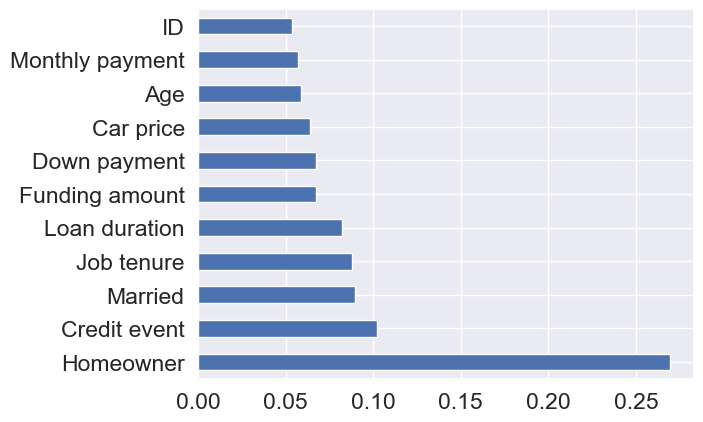

In [ ]:
model = XGBClassifier(n_estimators=300,
                                 max_depth=10,
                                 learning_rate=0.05)
evaluate_classifier(model)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.base import clone
model_lr_balanced = clone(model)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train==1)
model_lr_balanced.set_params(scale_pos_weight = ratio)
model_lr_balanced.name = "XGBoost with balanced weights"
evaluate_classifier(model_lr_balanced)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1)
model_rf_balanced = clone(model_rf)
model_rf_balanced.set_params(class_weight='balanced_subsample')
model_rf_balanced.name = "Balanced Subsample Random Forest"

evaluate_classifier(model_rf_balanced)

In [ ]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.under_sampling import RandomUnderSampler

model_lr_undersampled = make_pipeline_imblearn(
    RandomUnderSampler(),
    XGBClassifier(n_estimators=300,
                                    max_depth=10,
                                    learning_rate=0.05)

)
model_lr_undersampled.name = "XGBClassifier from rebalanced undersampled data"

evaluate_classifier(model_lr_undersampled)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

model_lr_oversampled = make_pipeline_imblearn(
    RandomOverSampler(),
    XGBClassifier(n_estimators=300,
                                max_depth=10,
                                learning_rate=0.05)
)
model_lr_oversampled.name = "XGBClassifier from rebalanced oversampled data"

evaluate_classifier(model_lr_oversampled)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_lr_smote = make_pipeline_imblearn(
    SMOTE(),
    XGBClassifier(n_estimators=300,
                                max_depth=10,
                                learning_rate=0.05)
)
model_lr_smote.name = "XGBClassifier from SMOTE sampled data"

evaluate_classifier(model_lr_smote)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

model_balanced_rf = make_pipeline(
    BalancedRandomForestClassifier(
        n_estimators=100, random_state=42
    )
)
model_balanced_rf.name = "Balanced Random Forest"

evaluate_classifier(model_balanced_rf)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_hgb = make_pipeline(
    HistGradientBoostingClassifier(random_state=42)
)
model_hgb.name = "Histogram-based Gradient Boosting"
evaluate_classifier(model_hgb)

In [ ]:
model_bagging = make_pipeline(
    BaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )
)
model_bagging.name = "Bagging Model"

evaluate_classifier(model_bagging)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
model_balanced_bagging = make_pipeline(
    BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(),
        n_estimators=20, random_state=42
    )
)
model_balanced_bagging.name = "Balanced Bagging Model"

evaluate_classifier(model_balanced_bagging)